<a href="https://colab.research.google.com/github/shophiagithub/firstrepo/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HEART DISEASE PREDICTION USING DECISION TREE**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # to draw decision tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score# for cross validation
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [5]:
#importing the data set
df=pd.read_csv('processed.cleveland[1].data',header=None)# header=none is to specify that the input data does not have a row or column labels
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
#changing the column numbers to column names
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**IDENTIFYING MISSING DATA & DEALING WITH MISSING DATA**

In [7]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [8]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [10]:
#calculating the missing values
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])

6

In [11]:
#printing the rows that contains missing values
df.loc[(df['ca']=='?')|(df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [12]:
len(df)#calculating the total rows of data set(including missing values)

303

In [13]:
#selecting all rows that do not contain missing values
df_no_missing=df.loc[(df['ca']!='?')&(df['thal']!='?')]
len(df_no_missing)

297

In [14]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [15]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [16]:
#splitting the dataset into x and y
x=df_no_missing.iloc[:,:-1]
x.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [17]:
y=df_no_missing.iloc[:,-1]
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

**ONE HOT ENCODING**
categorical:
1.thal
2.cp
3.ca
4.restecg
5.slope

In [18]:
x_encoded=pd.get_dummies(x, columns=['thal','ca','cp','restecg','slope'])
x_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,thal_3.0,thal_6.0,...,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,1,...,1,0,0,0,0,0,1,0,0,1
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,1,0,...,0,0,0,1,0,0,1,0,1,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,0,0,1,0,0,1,0,1,0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,1,0,...,0,0,1,0,1,0,0,0,0,1
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,1,0,...,0,1,0,0,0,0,1,1,0,0


In [19]:
y.unique()

array([0, 2, 1, 3, 4])

In [20]:
#since output is greater that 1 (for binary task should be 0 or 1) considering the outputs that is greater than 1 as 1
y_not_zero=y>0
y[y_not_zero]=1
y.unique()

<ipython-input-20-7bd517cc4843>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y_not_zero]=1


array([0, 1])

**BUILDING THE CLASSIFICATION TREE**

In [21]:
# Splitting the dataset into training set and  testset
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,random_state=42)
# creating the decision tree
clf_dect=DecisionTreeClassifier(random_state=42)
clf_dect.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

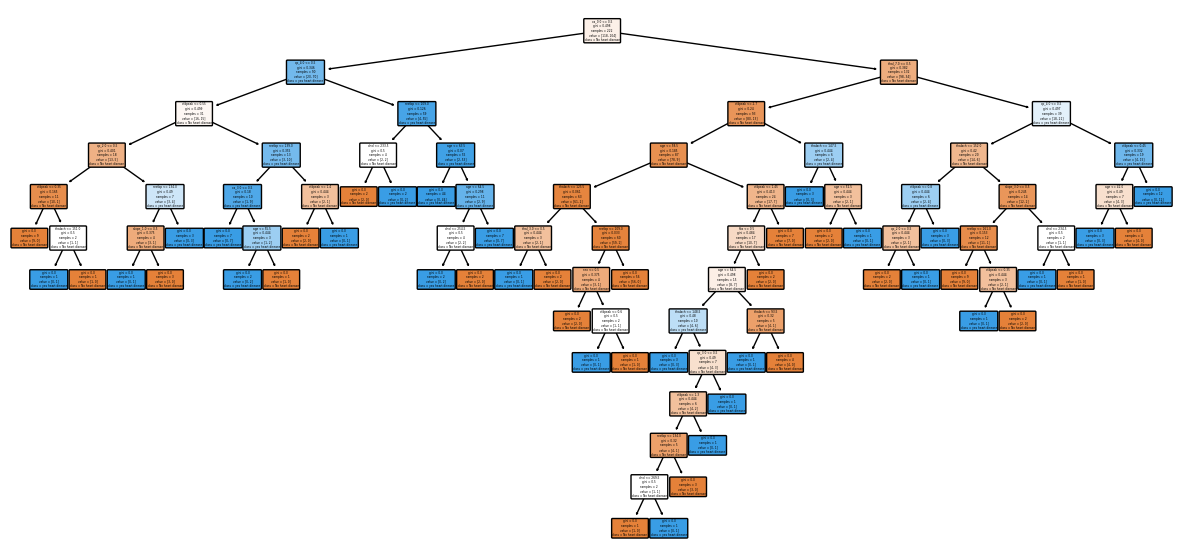

In [22]:
# plotting the decision tree
plt.figure(figsize=(15,7))
plot_tree(clf_dect,class_names=["No heart disease","yes heart disease"],filled=True,rounded=True,feature_names=x_encoded.columns);

In [23]:
#testing how this decision tree works on test set by plotting the confusion matrix
y_pred=clf_dect.predict(x_test)
cm=confusion_matrix(y_test,y_pred,labels=clf_dect.classes_)#confusion matrix
print(cm)

[[30 12]
 [ 6 27]]


In [24]:
accuracy_score(y_pred,y_test)

0.76

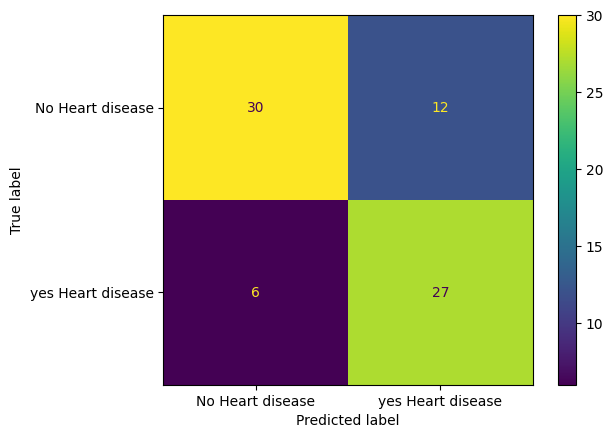

In [25]:
#plotting the confusion matrix
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Heart disease','yes Heart disease'])
cm_disp.plot()

**POST PRUNING IN DECISION TREE(PREVENT OVERFITTING USING COST COMPLEXITY PRUNING)**

In [26]:
# in this cofusion matrix out of 42 ,30 people have been correctly classified and out of 33 people 27 people only correctly classified so our model is overfitting  so performing cost complexity pruning
path=clf_dect.cost_complexity_pruning_path(x_train,y_train)#determine the value of alpha
ccp_alphas,impurities=path.ccp_alphas,path.impurities
ccp_alphas=ccp_alphas[:-1]#excluding the maximum value of alpha
print(ccp_alphas)

[0.         0.00295295 0.0036036  0.003861   0.00405405 0.004095
 0.0041184  0.00429358 0.00541298 0.00578761 0.00600601 0.00600601
 0.00600601 0.00667591 0.00675676 0.00757375 0.00811505 0.00868726
 0.00889851 0.01038181 0.0105777  0.01422475 0.01604051 0.01642461
 0.02103075 0.03680006 0.03934523]


In [27]:
#creating a list
clfs=[]
#creating decision tree per value of alpha ans store it in the list
for ccp_alpha in ccp_alphas:
  clf_dect=DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
  clf_dect.fit(x_train,y_train)
  clfs.append(clf_dect)
print("number of nodes in the last tree is:{} with ccp_alpha:{}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

number of nodes in the last tree is:3 with ccp_alpha:0.039345232893619964


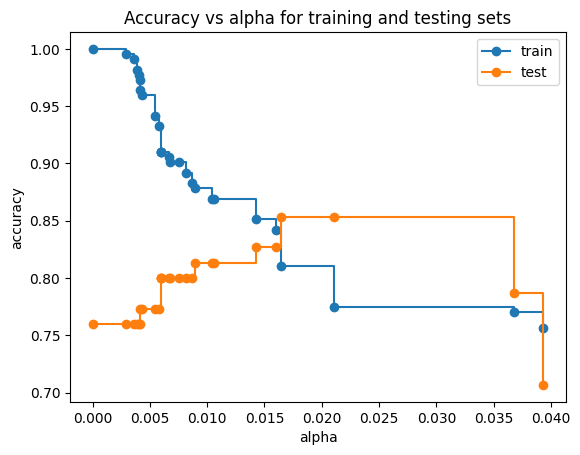

In [28]:
# plotting accuracy vs alpha for training and testing sets
train_scores=[clf_dect.score(x_train,y_train) for clf_dect in clfs]
test_scores=[clf_dect.score(x_test,y_test) for clf_dect in clfs]
fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [29]:
clf_dect=DecisionTreeClassifier(random_state=42,ccp_alpha=0.017)
clf_dect.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.017, random_state=42)

In [30]:
#getting the accuracy score
y_pred=clf_dect.predict(x_test)
accuracy_score(y_test,y_pred)

0.8533333333333334

PERFORMING  CROSS VALIDATION**

<Axes: xlabel='tree'>

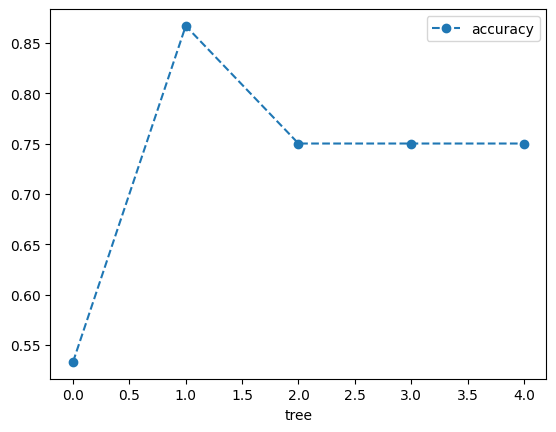

In [31]:
# performing cross validation to improe the accuracy
from sklearn.model_selection import cross_val_score
clf_dect=DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)
scores=cross_val_score(clf_dect,x_train,y_train,cv=5)
# plotting
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

<Axes: xlabel='alpha'>

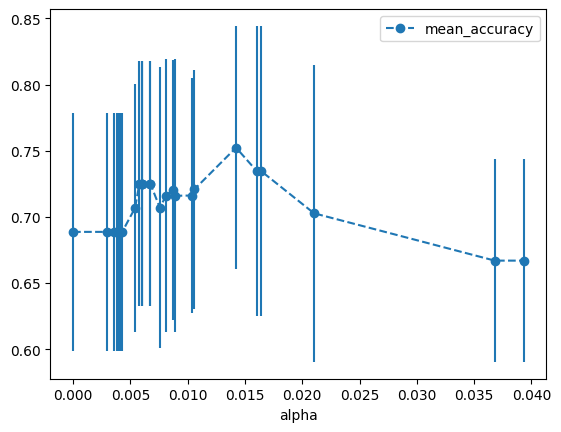

In [32]:
#creating an empty list
alpha_loop_values=[]
for ccp_alpha in ccp_alphas:
  clf_dect=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  scores=cross_val_score(clf_dect,x_train,y_train,cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [33]:
#finding the ideal alpha value between 0.014 and 0.015
ideal_ccp_alpha=alpha_results[(alpha_results['alpha']>0.014)&(alpha_results['alpha']<0.015)]['alpha']
print(ideal_ccp_alpha)

21    0.014225
Name: alpha, dtype: float64


In [34]:
# converting alpha to a float
ideal_ccp_alpha=float(ideal_ccp_alpha)
print(ideal_ccp_alpha)

0.014224751066856332


In [35]:
clf_dect_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dect_pruned.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

[[34  8]
 [ 5 28]]


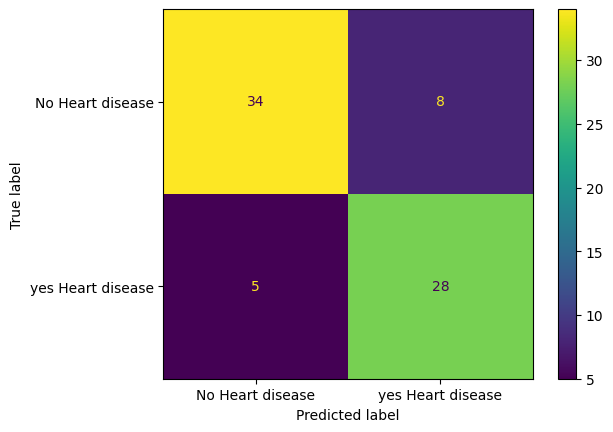

In [36]:
# plotting the confusion matrix
y_pred=clf_dect_pruned.predict(x_test)
cm=confusion_matrix(y_test,y_pred,labels=clf_dect_pruned.classes_)#confusion matrix
print(cm)
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Heart disease','yes Heart disease'])
cm_disp.plot()

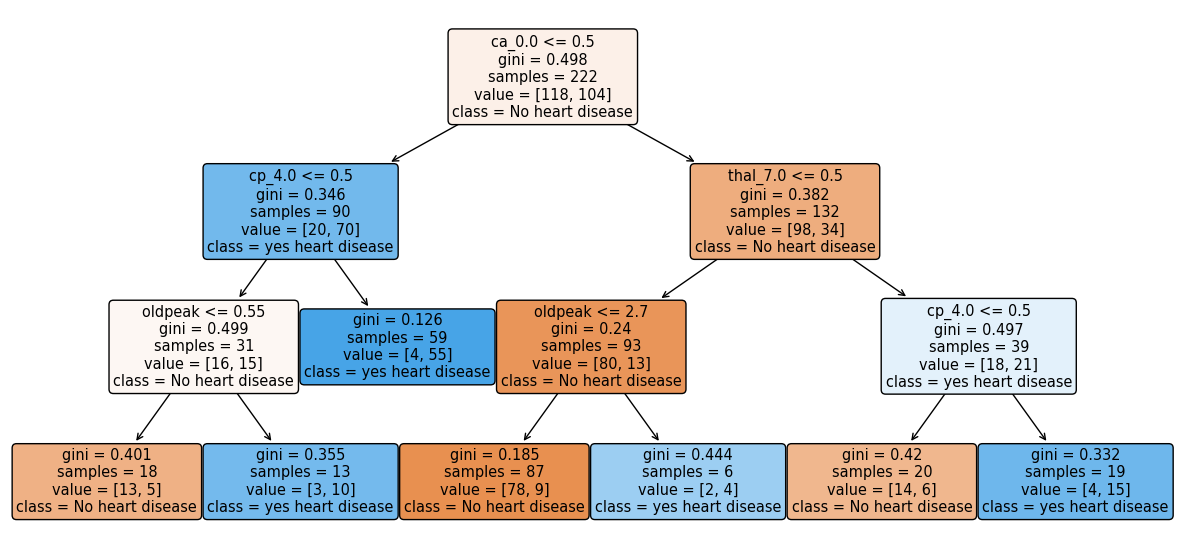

In [37]:
plt.figure(figsize=(15,7))
plot_tree(clf_dect_pruned,class_names=["No heart disease","yes heart disease"],filled=True,rounded=True,feature_names=x_encoded.columns);